In [1]:
import numpy as np
from sklearn import linear_model, preprocessing, pipeline
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()

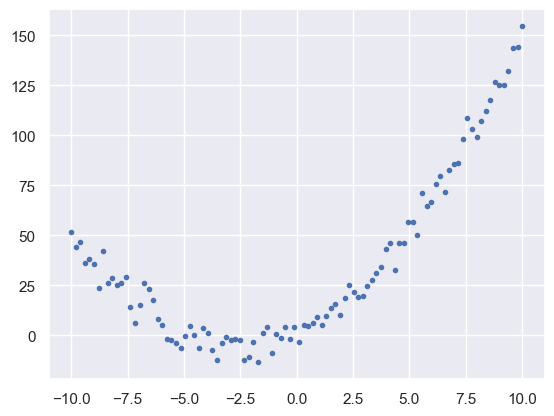

In [2]:
def create_data(n_points):
    x = np.linspace(-10, 10, n_points)
    y = x**2 + 5*x + 1 + 5* np.random.randn(n_points)
    return x, y
x, y = create_data(100)
plt.plot(x,y, '.')

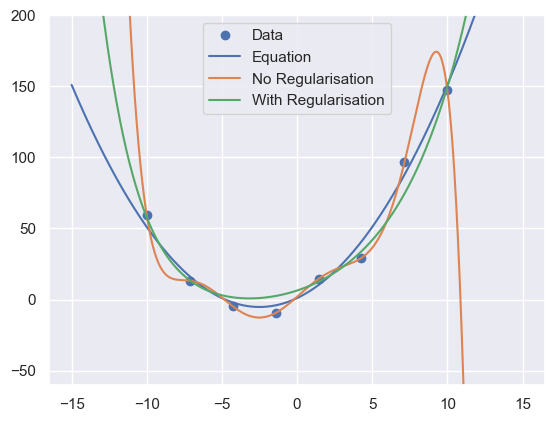

In [3]:
np.random.seed(1)
# Create models
model = pipeline.Pipeline([
    ('poly', preprocessing.PolynomialFeatures(degree=8)),
    ('scaler', preprocessing.StandardScaler()), 
    ('model', linear_model.LinearRegression())
    ])
model_l2 = pipeline.Pipeline([
    ('poly', preprocessing.PolynomialFeatures(degree=8)),
    ('scaler', preprocessing.StandardScaler()), 
    ('model', linear_model.Ridge(alpha=1))
    ])

x, y = create_data(8)

model.fit(x.reshape(-1,1), y.reshape(-1,1))
model_l2.fit(x.reshape(-1,1), y.reshape(-1,1))

# Create test data 
x_pred = np.linspace(-15, 15, 1000).reshape(-1, 1)

y_pred = model.predict(x_pred)
y_pred_l2 = model_l2.predict(x_pred)

plt.plot(x,y, 'o', label='Data')
plt.plot(x_pred, x_pred**2 + 5*x_pred + 1, label='Equation', color='b')
plt.plot(x_pred, y_pred, label='No Regularisation')
plt.plot(x_pred, y_pred_l2, label='With Regularisation')
plt.ylim(-60, 200)
plt.legend()
